In [40]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# Load the dataset to explore its structure
file_path = 'C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged flows DB ALL HEADERS.csv'
try:
    df = pd.read_csv(file_path)
    # Display the first few rows and some basic statistics about the dataset
    df_head = df.head()
    df_info = df.info()
    df_describe = df.describe()
except Exception as e:
    df_head, df_info, df_describe = None, str(e), None

df_head, df_info, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14608 entries, 0 to 14607
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     14608 non-null  int64  
 1   Date                           14608 non-null  object 
 2   Period End                     14608 non-null  object 
 3   year                           14608 non-null  int64  
 4   month                          14608 non-null  int64  
 5   YMD                            14608 non-null  object 
 6   To Musina,Total_3201           14374 non-null  float64
 7   To Musina,Light_3201           14374 non-null  float64
 8   To Musina,Short HV_3201        14374 non-null  float64
 9   To Musina,Medium HV_3201       14374 non-null  float64
 10  To Musina,Long HV_3201         14374 non-null  float64
 11  To Beit Bridge,Total_3201      14374 non-null  float64
 12  To Beit Bridge,Light_3201      14374 non-null 

(   Unnamed: 0        Date Period End  year  month         YMD  \
 0           0  2018-01-01   03:00:00  2018      1  2018-01-01   
 1           1  2018-01-01   06:00:00  2018      1  2018-01-01   
 2           2  2018-01-01   09:00:00  2018      1  2018-01-01   
 3           3  2018-01-01   12:00:00  2018      1  2018-01-01   
 4           4  2018-01-01   15:00:00  2018      1  2018-01-01   
 
    To Musina,Total_3201  To Musina,Light_3201  To Musina,Short HV_3201  \
 0                 129.0                  98.0                      6.0   
 1                 181.0                 150.0                      0.0   
 2                 200.0                 184.0                      3.0   
 3                 221.0                 187.0                      6.0   
 4                 250.0                 221.0                      5.0   
 
    To Musina,Medium HV_3201  ...  To Musina,Short HV_3202  \
 0                      13.0  ...                     52.0   
 1                      16

In [42]:
# Check for missing values in the dataset
missing_values_count = df.isnull().sum()

# Filter out columns where all values are present (missing count = 0)
missing_values_non_zero = missing_values_count[missing_values_count > 0]

missing_values_non_zero

To Musina,Total_3201             234
To Musina,Light_3201             234
To Musina,Short HV_3201          234
To Musina,Medium HV_3201         234
To Musina,Long HV_3201           234
To Beit Bridge,Total_3201        234
To Beit Bridge,Light_3201        234
To Beit Bridge,Short HV_3201     234
To Beit Bridge,Medium HV_3201    234
To Beit Bridge,Long HV_3201      234
Road,Total_3201                  234
Road,Light_3201                  234
Road,Short HV_3201               234
Road,Medium HV_3201              234
Road,Long HV_3201                234
To Beit Bridge,Total_3202        124
To Beit Bridge,Light_3202        124
To Beit Bridge,Short HV_3202     124
To Beit Bridge,Medium HV_3202    124
To Beit Bridge,Long HV_3202      124
To Musina,Total_3202             124
To Musina,Light_3202             124
To Musina,Short HV_3202          124
To Musina,Medium HV_3202         124
To Musina,Long HV_3202           124
Road,Total_3202                  124
Road,Light_3202                  124
R

In [43]:
# Convert the 'Date' column to a DateTime object
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by the 'Date' column
df_sorted = df.sort_values(by='Date')

# Display the first few rows after sorting
df_sorted_head = df_sorted.head()
df_sorted_head

,Unnamed: 0,Date,Period End,year,month,YMD,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201",...,"To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",_merge,dt
0,0,2018-01-01,03:00:00,2018,1,2018-01-01,129.0,98.0,6.0,13.0,...,52.0,15.0,21.0,485.0,354.0,63.0,33.0,35.0,both,2018-01-01
1,1,2018-01-01,06:00:00,2018,1,2018-01-01,181.0,150.0,0.0,16.0,...,20.0,11.0,41.0,476.0,356.0,30.0,28.0,62.0,both,2018-01-01
2,2,2018-01-01,09:00:00,2018,1,2018-01-01,200.0,184.0,3.0,2.0,...,17.0,10.0,16.0,456.0,389.0,30.0,12.0,25.0,both,2018-01-01
3,3,2018-01-01,12:00:00,2018,1,2018-01-01,221.0,187.0,6.0,9.0,...,25.0,5.0,21.0,491.0,387.0,49.0,9.0,46.0,both,2018-01-01
4,4,2018-01-01,15:00:00,2018,1,2018-01-01,250.0,221.0,5.0,14.0,...,18.0,3.0,15.0,607.0,531.0,35.0,4.0,37.0,both,2018-01-01


In [44]:
# Identify columns with missing values and the number of missing values in each column
missing_data_summary = df.isnull().sum()
missing_columns = missing_data_summary[missing_data_summary > 0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_columns / df.shape[0]) * 100

missing_columns, missing_percentage

(To Musina,Total_3201             234
 To Musina,Light_3201             234
 To Musina,Short HV_3201          234
 To Musina,Medium HV_3201         234
 To Musina,Long HV_3201           234
 To Beit Bridge,Total_3201        234
 To Beit Bridge,Light_3201        234
 To Beit Bridge,Short HV_3201     234
 To Beit Bridge,Medium HV_3201    234
 To Beit Bridge,Long HV_3201      234
 Road,Total_3201                  234
 Road,Light_3201                  234
 Road,Short HV_3201               234
 Road,Medium HV_3201              234
 Road,Long HV_3201                234
 To Beit Bridge,Total_3202        124
 To Beit Bridge,Light_3202        124
 To Beit Bridge,Short HV_3202     124
 To Beit Bridge,Medium HV_3202    124
 To Beit Bridge,Long HV_3202      124
 To Musina,Total_3202             124
 To Musina,Light_3202             124
 To Musina,Short HV_3202          124
 To Musina,Medium HV_3202         124
 To Musina,Long HV_3202           124
 Road,Total_3202                  124
 Road,Light_

In [45]:
# Apply forward-fill to impute the missing values in the sorted dataset
df_filled = df_sorted.fillna(method='ffill')

# Check if any missing values remain
missing_values_after_fill = df_filled.isnull().sum().sum()

missing_values_after_fill

C:\Users\shume\AppData\Local\Temp\ipykernel_3164\3416050338.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_sorted.fillna(method='ffill')


0

In [46]:
# Resample the dataset into daily aggregates by summing counts for each date
df_daily = df_filled.groupby('Date').sum()

# Display the first few rows of the daily aggregated dataset
df_daily_head = df_daily.head()
df_daily_head


,Unnamed: 0,Period End,year,month,YMD,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201",...,"To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",_merge,dt
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,28,03:00:0006:00:0009:00:0012:00:0015:00:0018:00:...,16144,8,2018-01-012018-01-012018-01-012018-01-012018-0...,1566.0,1323.0,36.0,88.0,119.0,...,201.0,76.0,203.0,4082.0,3266.0,316.0,143.0,357.0,bothbothbothbothbothbothbothboth,2018-01-012018-01-012018-01-012018-01-012018-0...
2018-01-02,92,24:00:0021:00:0015:00:0018:00:0009:00:0006:00:...,16144,8,2018-01-022018-01-022018-01-022018-01-022018-0...,2936.0,2598.0,76.0,123.0,139.0,...,327.0,143.0,283.0,6848.0,5581.0,560.0,234.0,473.0,bothbothbothbothbothbothbothboth,2018-01-022018-01-022018-01-022018-01-022018-0...
2018-01-03,156,03:00:0006:00:0009:00:0012:00:0015:00:0018:00:...,16144,8,2018-01-032018-01-032018-01-032018-01-032018-0...,3825.0,3428.0,104.0,99.0,194.0,...,373.0,208.0,394.0,8895.0,7302.0,657.0,305.0,631.0,bothbothbothbothbothbothbothboth,2018-01-032018-01-032018-01-032018-01-032018-0...
2018-01-04,220,21:00:0024:00:0015:00:0018:00:0009:00:0006:00:...,16144,8,2018-01-042018-01-042018-01-042018-01-042018-0...,4050.0,3556.0,110.0,143.0,241.0,...,422.0,236.0,403.0,9471.0,7692.0,719.0,345.0,715.0,bothbothbothbothbothbothbothboth,2018-01-042018-01-042018-01-042018-01-042018-0...
2018-01-05,284,03:00:0006:00:0009:00:0012:00:0015:00:0018:00:...,16144,8,2018-01-052018-01-052018-01-052018-01-052018-0...,4247.0,3697.0,153.0,147.0,250.0,...,419.0,212.0,356.0,9443.0,7683.0,735.0,327.0,698.0,bothbothbothbothbothbothbothboth,2018-01-052018-01-052018-01-052018-01-052018-0...


In [47]:
# To prepare the dataset for daily aggregation, we'll set the 'Date' column as the index
df_cleaned.set_index('Date', inplace=True)

# Resample the data to get daily aggregates. We'll use the sum as the aggregation method.
df_daily = df_cleaned.resample('D').sum()

# Show the first few rows of the daily aggregated dataset
df_daily.head()


,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201","To Beit Bridge,Long HV_3201",...,"To Musina,Total_3202","To Musina,Light_3202","To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202"
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1566.0,1323.0,36.0,88.0,119.0,2521.0,2184.0,91.0,71.0,175.0,...,2503.0,2023.0,201.0,76.0,203.0,4082.0,3266.0,316.0,143.0,357.0
2018-01-02,2936.0,2598.0,76.0,123.0,139.0,3919.0,3480.0,101.0,100.0,238.0,...,3863.0,3110.0,327.0,143.0,283.0,6848.0,5581.0,560.0,234.0,473.0
2018-01-03,3825.0,3428.0,104.0,99.0,194.0,5135.0,4503.0,162.0,133.0,337.0,...,5005.0,4030.0,373.0,208.0,394.0,8895.0,7302.0,657.0,305.0,631.0
2018-01-04,4050.0,3556.0,110.0,143.0,241.0,5459.0,4805.0,172.0,153.0,329.0,...,5353.0,4292.0,422.0,236.0,403.0,9471.0,7692.0,719.0,345.0,715.0
2018-01-05,4247.0,3697.0,153.0,147.0,250.0,5291.0,4687.0,172.0,128.0,304.0,...,5151.0,4164.0,419.0,212.0,356.0,9443.0,7683.0,735.0,327.0,698.0


In [48]:
# Save the df_daily DataFrame to a CSV file
df_daily.to_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated.csv')


In [68]:
dataset = pd.read_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated.csv')

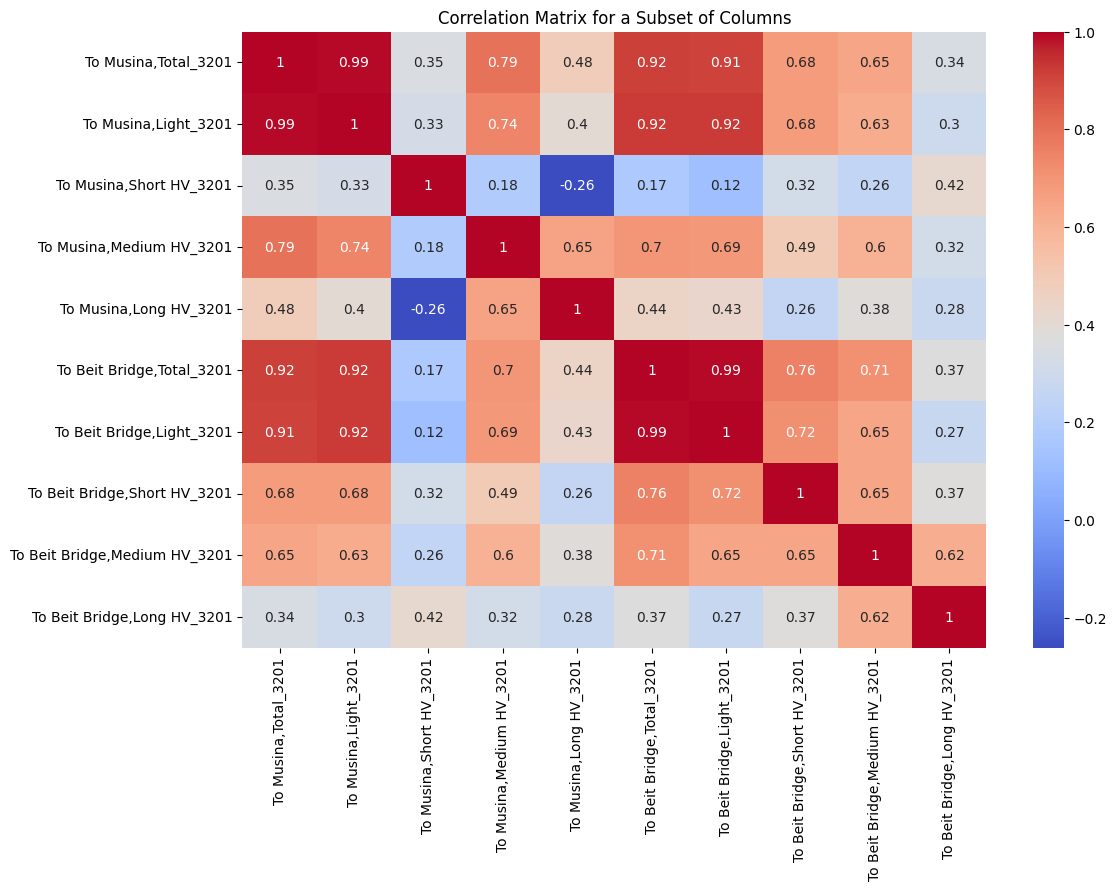

(       To Musina,Total_3201  To Musina,Light_3201  To Musina,Short HV_3201  \
 count           1826.000000           1826.000000              1826.000000   
 mean            2909.083242           2374.026835               157.750274   
 std              872.104534            776.039106                69.129611   
 min                0.000000              0.000000                 0.000000   
 25%             2504.500000           1988.500000               119.000000   
 50%             2893.000000           2351.500000               142.000000   
 75%             3432.000000           2839.000000               181.000000   
 max             8024.000000           7044.000000               561.000000   
 
        To Musina,Medium HV_3201  To Musina,Long HV_3201  \
 count               1826.000000             1826.000000   
 mean                 123.060241              254.245893   
 std                   38.552731               96.792892   
 min                    0.000000               

In [73]:
# Importing necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = dataset.describe()

# Checking for null values
null_values = dataset.isnull().sum()

# Plotting correlations for a subset of columns to avoid clutter
correlation_matrix = dataset.iloc[:, 1:11].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for a Subset of Columns")
plt.show()

summary_stats, null_values

Summary Statistics: The dataset has values ranging from 0 to thousands for different types of traffic flows. It seems like the data is quite varied.
Null Values: There are no null values, which is good for analysis.
Correlation Matrix: For a subset of columns, we see various levels of correlation among them, which may be useful for feature selection later.

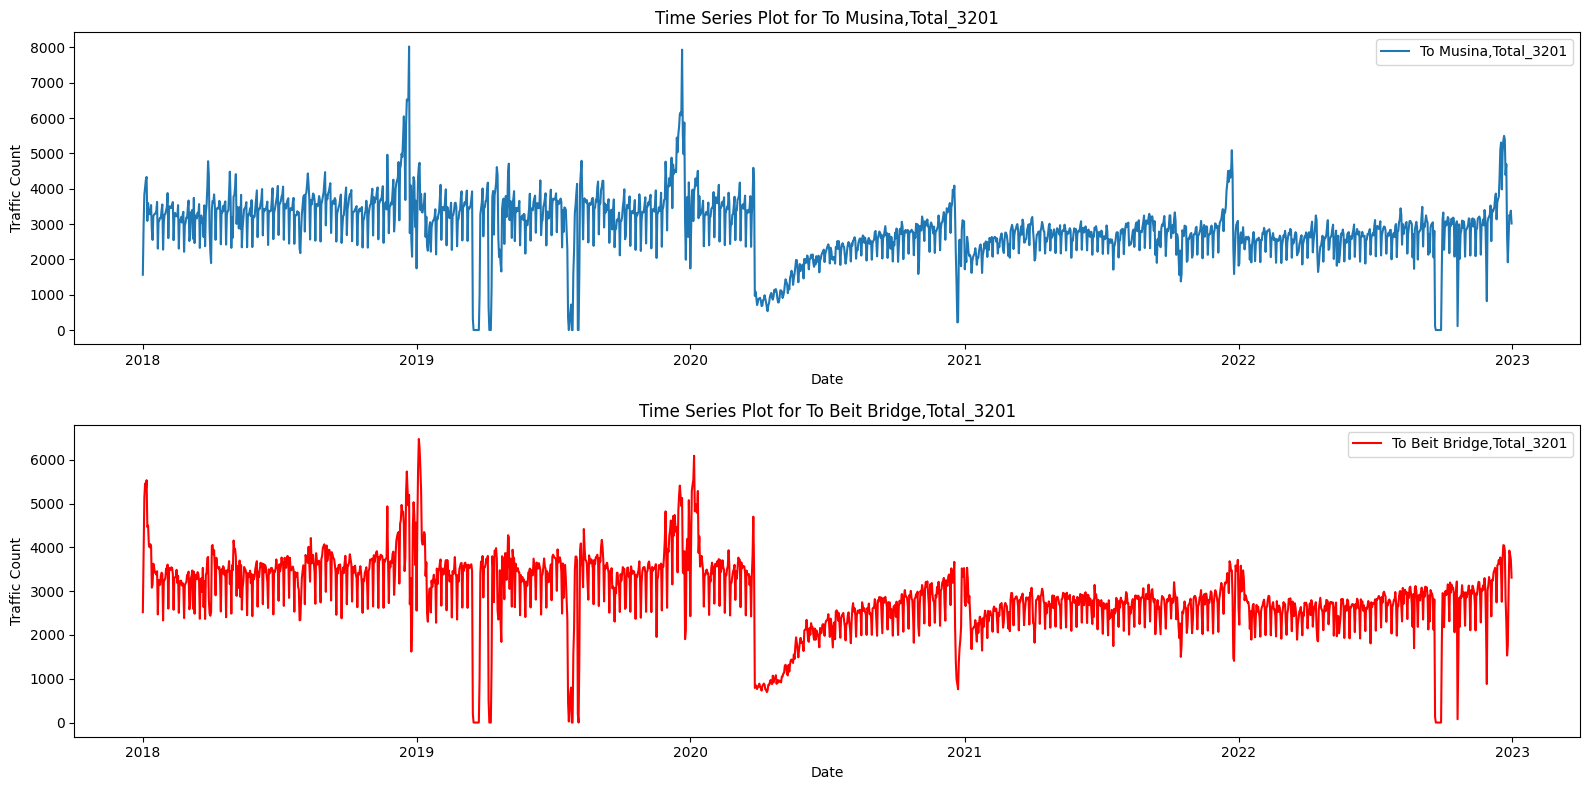

In [75]:
# Importing necessary libraries for time series analysis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Convert the 'Date' column to datetime format and set it as the index
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)

# Plotting time series for a couple of columns to understand trends
plt.figure(figsize=(16, 8))

# Plot for "To Musina,Total_3201"
plt.subplot(2, 1, 1)
plt.plot(dataset['To Musina,Total_3201'], label='To Musina,Total_3201')
plt.title('Time Series Plot for To Musina,Total_3201')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.legend()

# Plot for "To Beit Bridge,Total_3201"
plt.subplot(2, 1, 2)
plt.plot(dataset['To Beit Bridge,Total_3201'], label='To Beit Bridge,Total_3201', color='r')
plt.title('Time Series Plot for To Beit Bridge,Total_3201')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.legend()

plt.tight_layout()
plt.show()


The time series plots provide initial insights into traffic trends for two total counts:

To Musina,Total_3201: Fluctuations are evident, with some periodic patterns that could suggest seasonality.
To Beit Bridge,Total_3201: Similar to the first plot, there are variations over time, potentially showing seasonal effects.

<Figure size 1600x600 with 0 Axes>

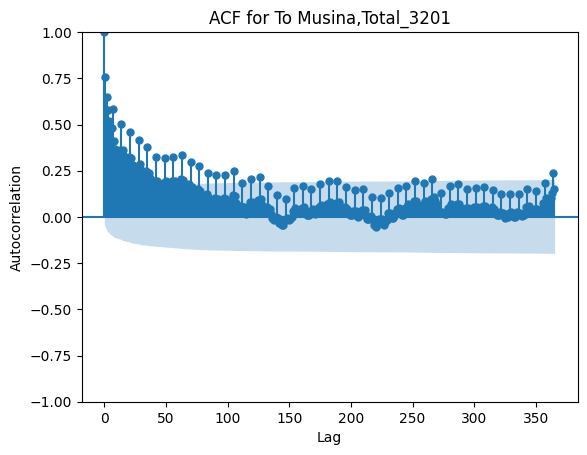

In [76]:
# Importing the necessary library for plotting ACF
from statsmodels.graphics.tsaplots import plot_acf

# Plotting ACF for "To Musina,Total_3201"
plt.figure(figsize=(16, 6))
plot_acf(dataset['To Musina,Total_3201'], lags=365, title='ACF for To Musina,Total_3201')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


The Autocorrelation Function (ACF) plot for "To Musina,Total_3201" shows spikes at specific lags. This can help us identify the periodicity or seasonality in the data. However, the spikes are not very pronounced, which suggests that the seasonality might be subtle or influenced by multiple factors.

From this plot, it seems that a yearly pattern could be present, as there are minor spikes at around lag 365. However, this is not very definitive.

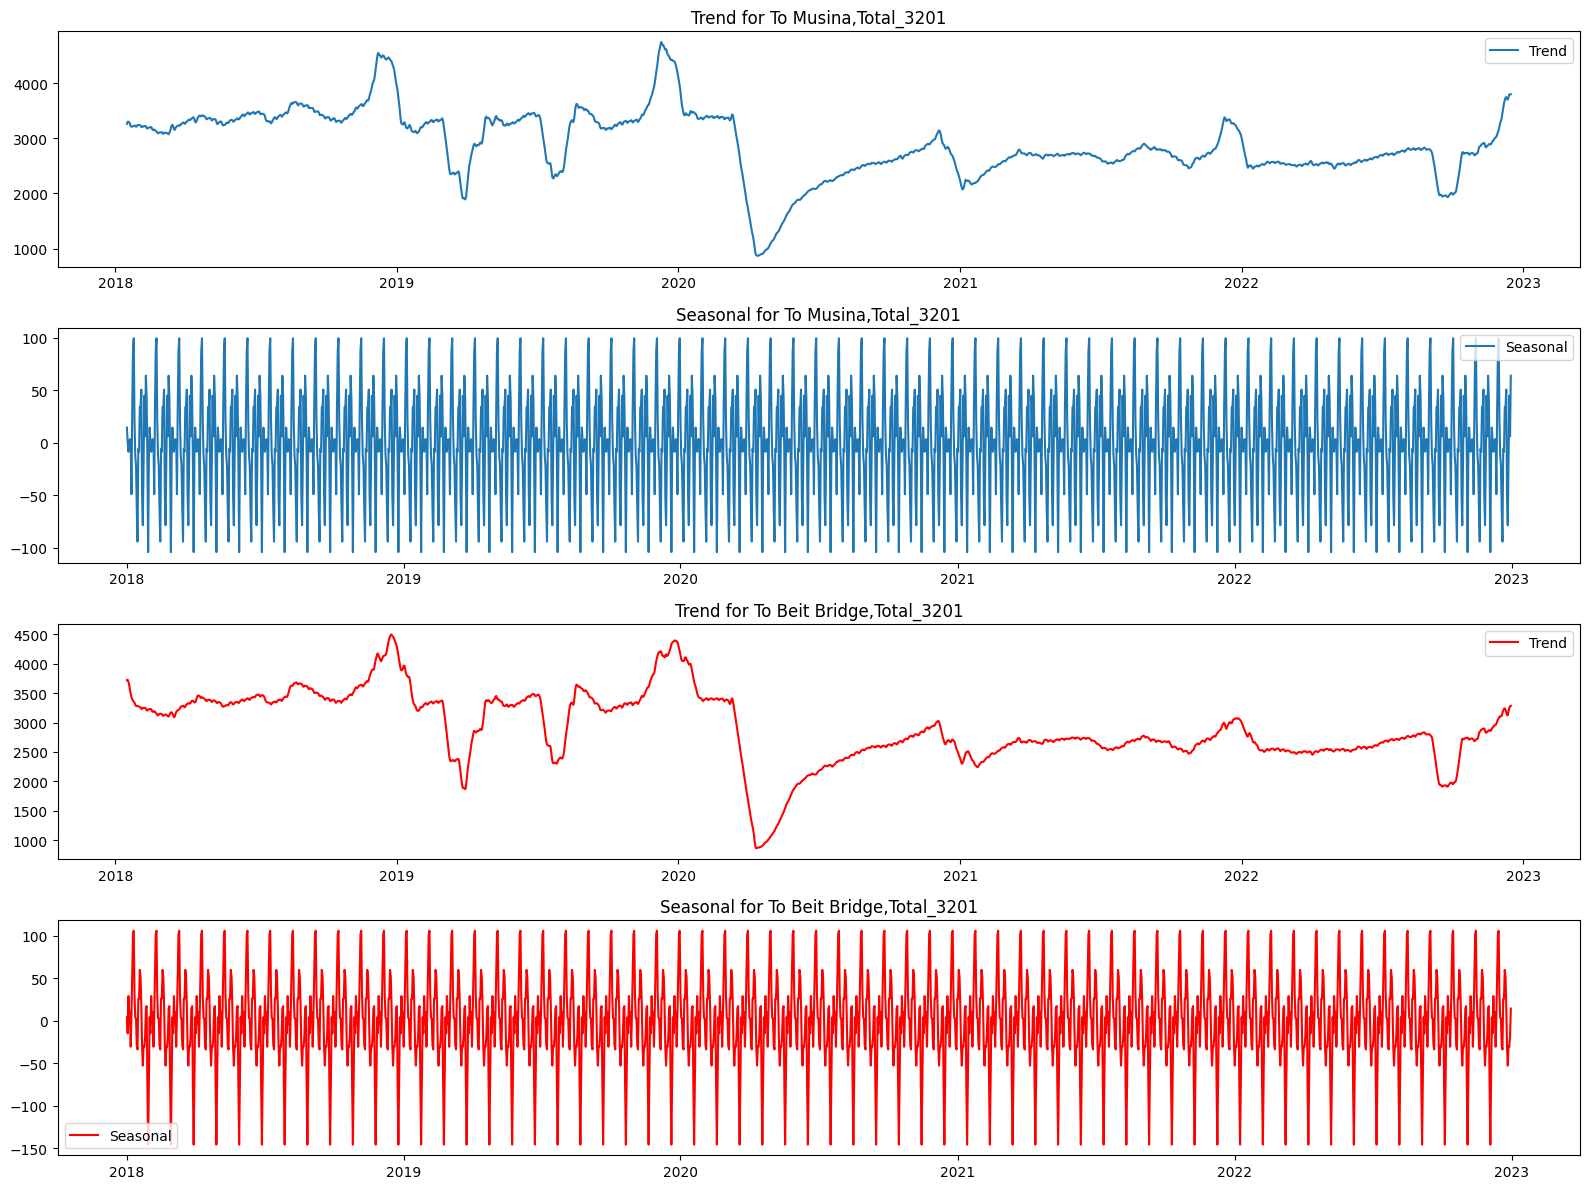

In [77]:
# Importing necessary libraries for seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with a period of 30 days
period = 30
decomposition_musina = seasonal_decompose(dataset['To Musina,Total_3201'], period=period)
decomposition_beitbridge = seasonal_decompose(dataset['To Beit Bridge,Total_3201'], period=period)

# Plotting the seasonal decomposition
plt.figure(figsize=(16, 12))

# For "To Musina,Total_3201"
plt.subplot(4, 1, 1)
plt.plot(decomposition_musina.trend, label='Trend')
plt.title('Trend for To Musina,Total_3201')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition_musina.seasonal, label='Seasonal')
plt.title('Seasonal for To Musina,Total_3201')
plt.legend()

# For "To Beit Bridge,Total_3201"
plt.subplot(4, 1, 3)
plt.plot(decomposition_beitbridge.trend, label='Trend', color='r')
plt.title('Trend for To Beit Bridge,Total_3201')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition_beitbridge.seasonal, label='Seasonal', color='r')
plt.title('Seasonal for To Beit Bridge,Total_3201')
plt.legend()

plt.tight_layout()
plt.show()


The seasonal decomposition with a period of 30 days reveals the following:

Trend for To Musina,Total_3201: There seems to be a general trend, though it's somewhat irregular.
Seasonal for To Musina,Total_3201: Clear seasonality is evident, repeating roughly every 30 days.
Trend for To Beit Bridge,Total_3201: Similar to the trend for To Musina, it also has some irregularities.
Seasonal for To Beit Bridge,Total_3201: A seasonal pattern is noticeable, similar to that for To Musina.

In [78]:
# Importing the Augmented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'Performing ADF test on {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    print(out.to_string())
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary ")

# Perform ADF test on "To Musina,Total_3201" and "To Beit Bridge,Total_3201"
adf_test(dataset['To Musina,Total_3201'], title='To Musina,Total_3201')
print()
adf_test(dataset['To Beit Bridge,Total_3201'], title='To Beit Bridge,Total_3201')


Performing ADF test on To Musina,Total_3201
ADF Test Statistic      -4.667095
p-value                  0.000097
# Lags Used             21.000000
# Observations        1804.000000
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

Performing ADF test on To Beit Bridge,Total_3201
ADF Test Statistic      -4.306247
p-value                  0.000433
# Lags Used             21.000000
# Observations        1804.000000
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


The Augmented Dickey-Fuller (ADF) test results are as follows:

To Musina,Total_3201: The p-value is less than 0.05, indicating that we can reject the null hypothesis. The data is stationary.
To Beit Bridge,Total_3201: Similarly, the p-value is less than 0.05, confirming that this series is also stationary.
Both series are stationary, which means they are suitable for time series modeling without the need for differencing or other transformations.